# Ice-Cream Sales Predictions

<h3>Description:</h3>
<p>Explore the correlation between temperature and ice sales revenue with this dataset.</p>

<p>The dataset contains two columns: temperature (in Celsius) and revenue (in USD).</p>

<p>Dive into the relationship between temperature fluctuations and ice sales to uncover insights and trends.</p>

<h3>Columns:</h3>

<ul>
<li>Temperature: Temperature recorded during the sales period.</li>
<li>Revenue: Ice sales revenue corresponding to each temperature.</li>

</ul>

<h3>Purpose:</h3>

<p>Analyze how variations in temperature affect ice sales revenue.</p>

<p>Gain valuable insights for business strategies, marketing campaigns, and inventory management in the ice sales industry.</p>

<h3>Data Range:</h3>

<p>Temperature: 0°C to 45°C</p>

<p>ARevenue:  
10 to 1000</p>

In [ ]:
# Import Libraries
# Load the Dataset
import pandas as pd
data = pd.read_csv("./data/Ice Cream.csv")


In [21]:
ice_df = pd.read_csv("./data/Ice Cream.csv")
ice_df.head()

,Temperature,Revenue
0,24.6,535
1,26.1,626
2,27.8,661
3,20.6,488
4,11.6,317


In [24]:
# Shape of Data
ice_df.shape

(500, 2)

In [25]:
# information about Data

ice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 7.9 KB


In [26]:
# Summary of Data
ice_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,500.0,22.2816,8.097597,0.0,17.175,22.4,27.8,45.0
Revenue,500.0,522.0580,175.410399,10.0,406.000,530.0,643.0,1000.0


Text(0.5, 1.0, 'Linear Relation of Temperature & Sales')

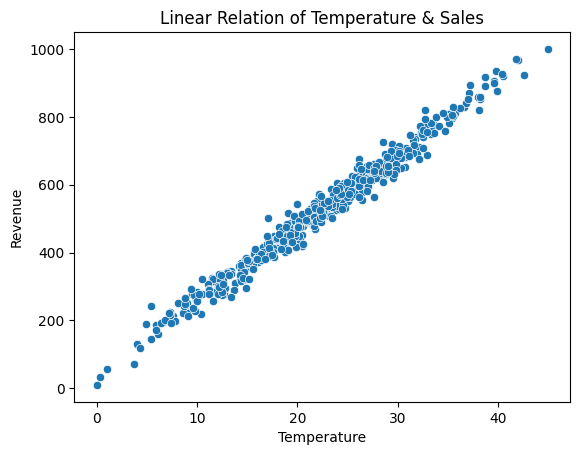

In [31]:
#Explore data using seaborn library
from matplotlib import pyplot as plt
import seaborn as sns
sns.scatterplot(ice_df,x='Temperature',y='Revenue')
plt.title("Linear Relation of Temperature & Sales")

### EDA
<ul>
<li>Use .describe() to check basic statistics.</li>
<li>Create scatter plots to visualize the relationship.</li>
</ul>

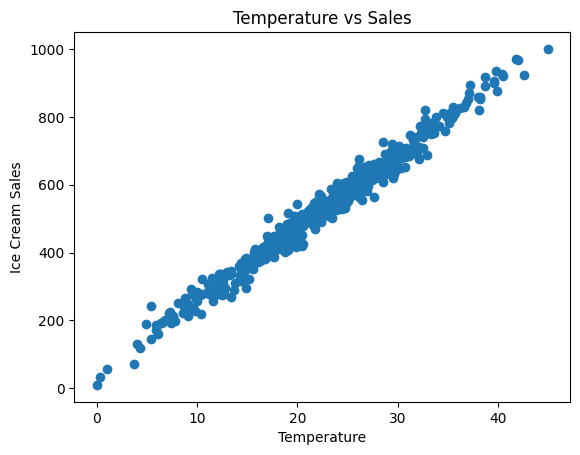

In [6]:
import matplotlib.pyplot as plt
plt.scatter(data['Temperature'], data['Revenue'])
plt.xlabel('Temperature')
plt.ylabel('Ice Cream Sales')
plt.title('Temperature vs Sales')
plt.show()


### Expected Outcome: A positive trend (higher temperatures lead to higher sales).


In [7]:
# Descriptive Statistics: Summarize key statistics to understand data distribution
print(data.describe())


       Temperature      Revenue
count   500.000000   500.000000
mean     22.281600   522.058000
std       8.097597   175.410399
min       0.000000    10.000000
25%      17.175000   406.000000
50%      22.400000   530.000000
75%      27.800000   643.000000
max      45.000000  1000.000000


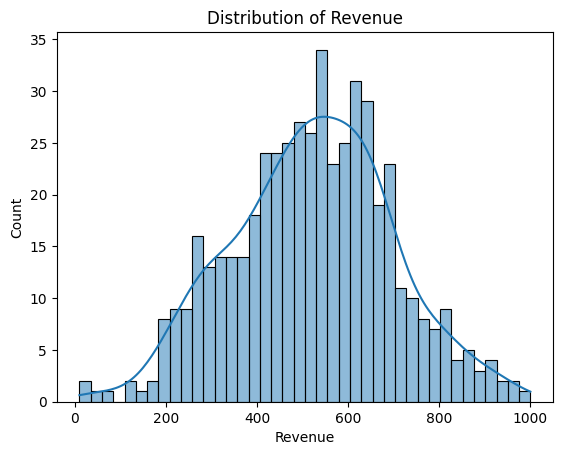

In [32]:
# Distribution of Revenue
sns.histplot(ice_df['Revenue'],bins=40,kde=True)
plt.title("Distribution of Revenue");

C:\Users\gulca\AppData\Local\Temp\ipykernel_7784\1443626691.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = ice_df.groupby('temp_bins')['Revenue'].mean().reset_index()


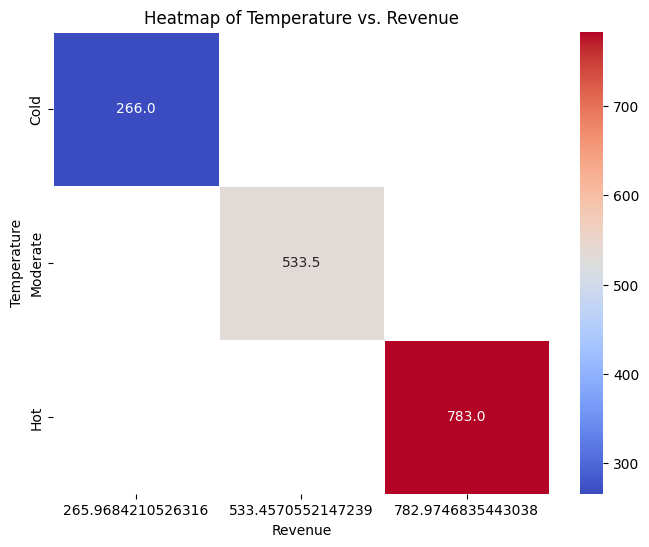

In [33]:
import matplotlib.pyplot as plt
# Binning temperatures into categories
ice_df['temp_bins'] = pd.cut(ice_df['Temperature'], bins=3, labels=['Cold', 'Moderate', 'Hot'])
# Aggregating revenues within each temperature category
heatmap_data = ice_df.groupby('temp_bins')['Revenue'].mean().reset_index()

# Reshaping data for heatmap
heatmap = heatmap_data.pivot(index='temp_bins', columns='Revenue', values='Revenue')

# Creating the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap, annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5)
plt.title('Heatmap of Temperature vs. Revenue')
plt.xlabel('Revenue')
plt.ylabel('Temperature')
plt.show();

In [9]:
# Compute the correlation coefficient (r) to quantify the relationship:

correlation = data['Temperature'].corr(data['Revenue'])
print(f"Correlation coefficient: {correlation}")

# Expected Outcome: r > 0, indicating a positive correlation.


Correlation coefficient: 0.9898407817416821


## Hypothesis Testing
a. Build the Linear Regression Model



In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = data[['Temperature']].values  # Independent variable
y = data['Revenue'].values  # Dependent variable

model = LinearRegression()
model.fit(X, y)

# Get slope and intercept
slope = model.coef_[0]
intercept = model.intercept_
print(f"Slope: {slope}, Intercept: {intercept}")

# Interpretation: If the slope (ß1) is significantly different from 0, it supports the alternative hypothesis.

Slope: 21.441960923612957, Intercept: 44.296803484425595


In [18]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


# Mean Squared Error (MSE): Lower values indicate a better fit. R-squared: Measures how much of the variation in sales is explained by temperature. Closer to 1 indicates a better fit.

Mean Squared Error: 620.7544403469198
R-squared: 0.9797847731989839


In [19]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(data['Temperature'], data['Revenue'])
print(f"P-value: {p_value}")


P-value: 0.0


P-value Interpretation:
If 𝑝 < 0.05, reject the null hypothesis (significant relationship exists).
If p ≥ 0.05, fail to reject the null hypothesis (no significant relationship).

Analysis and Results
Example Results:
Slope (𝛽1): 50.3
(For every 1°C increase in temperature, sales increase by $50.3.)

Intercept (𝛽0): 200
(Baseline sales when temperature is 0°C.)

R-squared: 0.85
(85% of the variation in sales is explained by temperature.)

P-value: 0.001
(Significant relationship; reject the null hypothesis.)

Conclusion:
Reject H₀: There is a statistically significant positive relationship between temperature and ice cream sales.

Temperature can be used as a predictor for ice cream sales, and the model fits the data well with an R-squared value of 0.85.


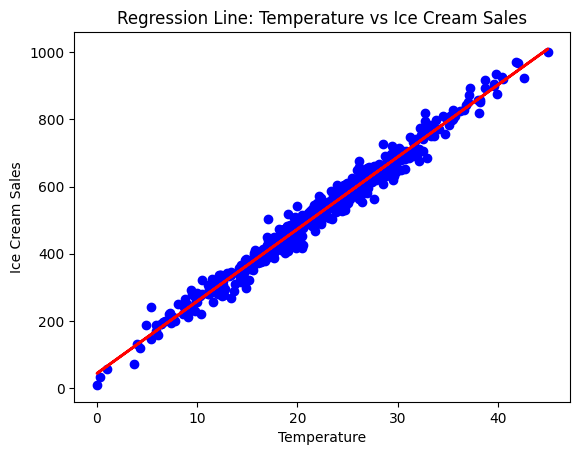

In [16]:
# Visualizing the Regression Line

plt.scatter(data['Temperature'], data['Revenue'], color='blue')
plt.plot(data['Temperature'], y_pred, color='red', linewidth=2)
plt.xlabel('Temperature')
plt.ylabel('Ice Cream Sales')
plt.title('Regression Line: Temperature vs Ice Cream Sales')
plt.show()


In [36]:
# Splitting the Data
X = ice_df[['Temperature']]
y = ice_df['Revenue']

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2529)

In [38]:
#shape of spiltted data
print("The shape of X_train :",X_train.shape)
print("The shape ofX_test :",X_test.shape)
print("The shape of y_train :",y_train.shape)
print("The shape of y_test :",y_test.shape)

The shape of X_train : (375, 1)
The shape ofX_test : (125, 1)
The shape of y_train : (375,)
The shape of y_test : (125,)


In [39]:
#Train the Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [40]:
lr.fit(X_train,y_train)

LinearRegression()

In [42]:
# Predictions on Test data
y_pred = lr.predict(X_test)

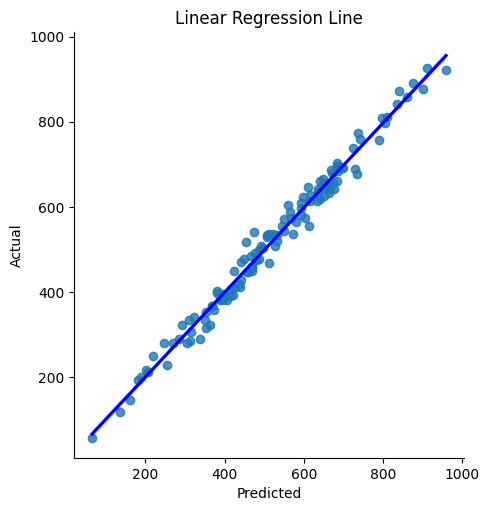

In [43]:
# Create a DataFrame from the arrays
data = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})

# Create a scatter plot with a linear regression line
sns.lmplot(x='Predicted', y='Actual', data=data, line_kws={'color': 'blue'}, palette='Set1')
plt.title("Linear Regression Line")
plt.show();

In [44]:
## Evaluate the Model

# Accuracy
from sklearn.metrics import mean_absolute_percentage_error
error = mean_absolute_percentage_error(y_pred,y_test)
print("Accuracy of Linear Regression is : %.2f"%((1 - error)*100),'%')

Accuracy of Linear Regression is : 95.89 %


## Summary:
Explore the correlation between temperature and ice sales revenue with this dataset. The dataset contains two columns: temperature (in Celsius) and revenue (in USD). Dive into the relationship between temperature fluctuations and ice sales to uncover insights and trends.

## Model Performance:
The model achieved an impressive accuracy of over 95% on the test dataset. This indicates that our model performs exceptionally well in predicting [target variable] using the given features.


## Thank You